# Decision Trees
- Decision Trees can perform both classification and regression tasks.
- Decision Trees are the fundamental components of Random Forests

## Simple Example of Decision Tree Classifier

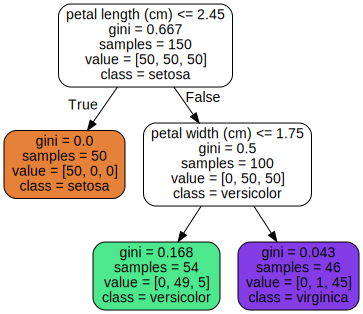

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

# load data
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2,
                                 criterion='gini')
tree_clf.fit(X, y)

export_graphviz(tree_clf,
            out_file= "img/iris_tree.dot",
            feature_names=iris.feature_names[2:],
            class_names=iris.target_names,
            rounded=True,
            filled=True
            )

Source.from_file("img/iris_tree.dot")

### How to make Predictions
We start at the root node(depth 0). This node asks whether the flower's petal length is smaller than 0.8 cm or not. If it is smaller than 0.8cm, we move down to the root's left child node(depth 1). Since the classifier does not ask further question, the predicted class is 'setosa'. But if the petal width is larger than 0.8cm, we down to the right child node(depth 1). Then classifier asks again if petah width is smaller than 1.75cm. If it is, we move down to left child node(depth 2) and we can not go further down, and the predicted class is 'versicolor'. If petal length is larger than 1.75cm, we move down to the right child node, and class 'Verginica' is predicted.

### Decision Boundary

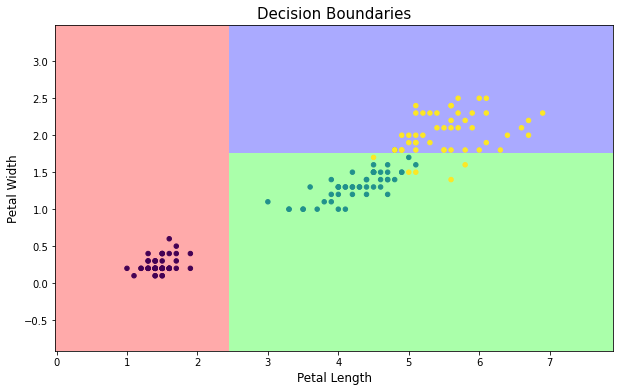

In [33]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
    
    X_new = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_new).reshape(xx.shape)
    
    cmap_light = mcolors.ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    
    fig, ax = plt.subplots(figsize=(10,6))
    _ = ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    _ = ax.scatter(X[:, 0], X[:, 1], c=y, s=20)
    _ = ax.set_title('Decision Boundaries', fontsize=15)
    _ = ax.set_xlabel('Petal Length', fontsize=12)
    _ = ax.set_ylabel('Petal Width', fontsize=12)
    
plot_decision_boundary(tree_clf, X, y, )

## Simple Decision Tree Regressor

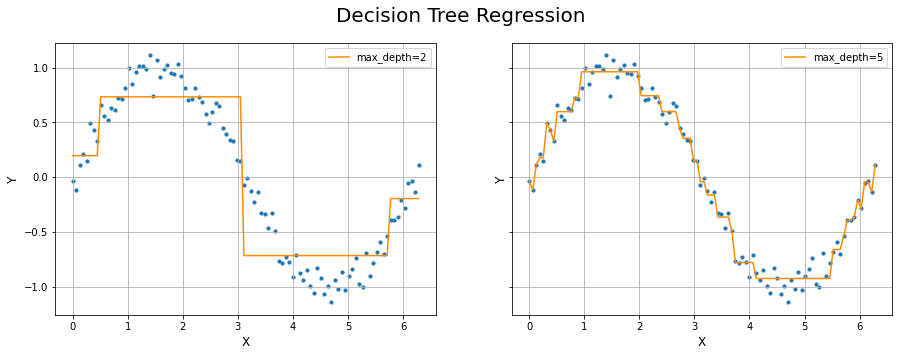

In [123]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np


def plot_dt_regression(reg1, reg2, X, y):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True)
    _ = ax1.grid(True)
    _ = ax2.grid(True)
    _ = ax1.scatter(X, y, s=10)
    _ = ax2.scatter(X, y, s=10)
        
    y_1 = reg1.predict(X)
    _ = ax1.plot(X, y_1, color='darkorange', label='max_depth=2')
    ax1.set_xlabel('X', fontsize=12)
    ax1.set_ylabel('Y', fontsize=12)
    ax1.legend()
    y_2 = reg2.predict(X)
    _ = ax2.plot(X, y_2, color='darkorange', label='max_depth=5')
    ax2.set_xlabel('X', fontsize=12)
    ax2.set_ylabel('Y', fontsize=12)
    ax2.legend()
    plt.suptitle('Decision Tree Regression', fontsize=20)

# generate data
X = np.linspace(0, 2*np.pi, 100)
X = X[:, np.newaxis]
gaussian_noise = np.random.randn(len(X),1)/ 10
y = np.sin(X) + gaussian_noise

# define and fit the model
reg1 = DecisionTreeRegressor(max_depth=2)
reg2 = DecisionTreeRegressor(max_depth=5)
reg1.fit(X,y)
reg2.fit(X,y)

# Plot
plot_dt_regression(reg1, reg2, X, y)
